In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

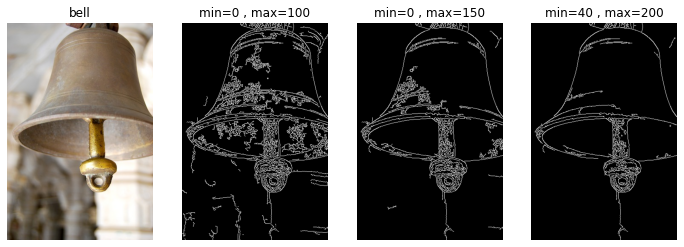

In [15]:
img = cv2.imread('../images/bell.jpg')

out1 = cv2.Canny(img,0,100)
out2 = cv2.Canny(img,0,150)
out3 = cv2.Canny(img,40,200)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig = plt.figure()
fig.set_size_inches(12, 12)
fig.add_subplot(141)
plt.title("bell")
plt.imshow(img_rgb)
plt.axis('off')
plt.subplot(142)
plt.title("min=0"+" , "+"max=100")
plt.imshow(out1,'gray')
plt.axis('off')
plt.subplot(143)
plt.title("min=0"+" , "+"max=150")
plt.imshow(out2,'gray')
plt.axis('off')
plt.subplot(144)
plt.title("min=40"+" , "+"max=200")
plt.imshow(out3,'gray')
plt.axis('off')
plt.show()

**Best values** : min = 40 , max = 200

In [16]:
def filter2D(img, kernel):
    k_size = kernel.shape[0]
    pad_size = k_size//2
    img = np.pad(img,(pad_size,pad_size),mode='edge')
    l = img.shape[0]
    b = img.shape[1]
    r=(l- k_size) +1
    c=(b- k_size) +1
    out = np.zeros((r,c))
    
    for i in range(r):
        for j in range(c):
            curr = img[i:i+k_size,j:j+k_size]
            out[i,j] = np.sum(np.multiply(curr,kernel)) 
    out[out<0]=0
    out[out>255]=255
    return out.astype(np.uint8) 

In [17]:
sobelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobely = -1*np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

prewittx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitty = -1*np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

robertsx = np.array([[0,1],[-1,0]])
robertsy = np.array([[1,0],[0,-1]])

laplacianx = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplaciany = np.array([[1,1,1],[1,-8,1],[1,1,1]])

In [18]:
kobe = cv2.imread('../images/kobe.png')
kobel = cv2.cvtColor(kobe,cv2.COLOR_BGR2GRAY)
sobx = filter2D(kobel,sobelx)
soby = filter2D(kobel,sobely)
prex = filter2D(kobel,prewittx)
prey = filter2D(kobel,prewitty)
robx = filter2D(kobel,robertsx)
roby = filter2D(kobel,robertsy)
lapx = filter2D(kobel,laplacianx)
lapy = filter2D(kobel,laplaciany)
canny = cv2.Canny(kobel,50,200)

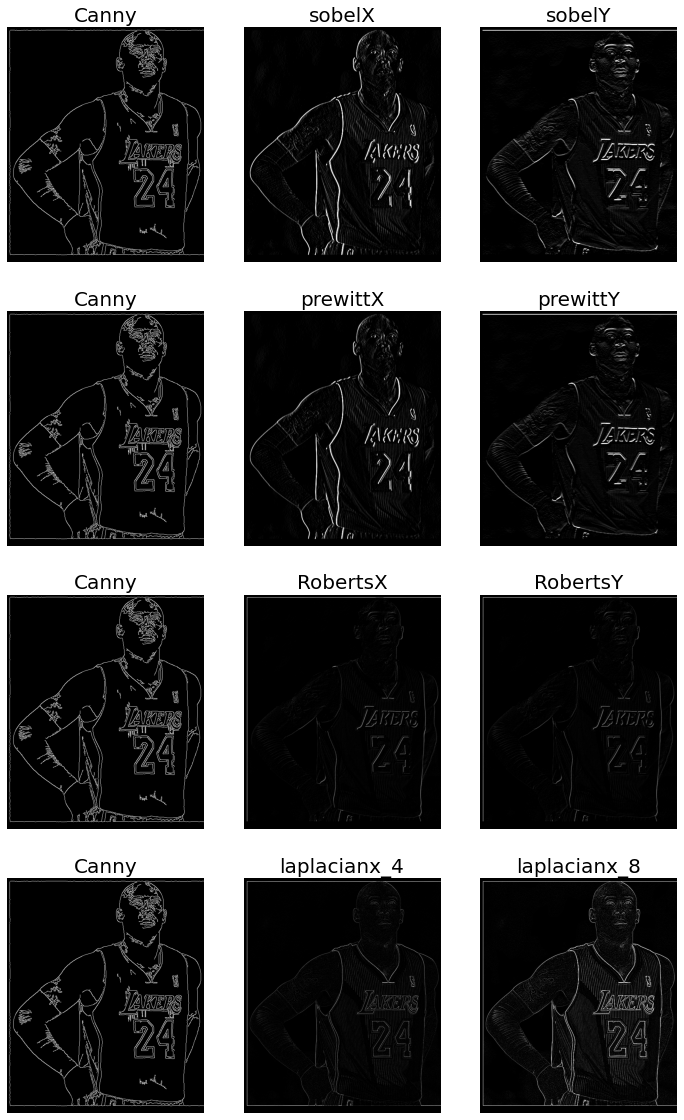

In [19]:
fig = plt.figure()
fig.set_size_inches(12, 20)

plt.subplot(4,3,1)
plt.title("Canny",fontsize=20)
plt.imshow(canny,cmap="gray")
plt.axis('off')
plt.subplot(4,3,2)
plt.title("sobelX",fontsize=20)
plt.imshow(sobx,cmap="gray")
plt.axis('off')
plt.subplot(4,3,3)
plt.title("sobelY",fontsize=20)
plt.imshow(soby,cmap="gray")
plt.axis('off')

plt.subplot(4,3,4)
plt.title("Canny",fontsize=20)
plt.imshow(canny,cmap="gray")
plt.axis('off')
plt.subplot(4,3,5)
plt.title("prewittX",fontsize=20)
plt.imshow(prex,cmap="gray")
plt.axis('off')
plt.subplot(4,3,6)
plt.title("prewittY",fontsize=20)
plt.imshow(prey,cmap="gray")
plt.axis('off')

plt.subplot(4,3,7)
plt.title("Canny",fontsize=20)
plt.imshow(canny,cmap="gray")
plt.axis('off')
plt.subplot(4,3,8)
plt.title("RobertsX",fontsize=20)
plt.imshow(roby,cmap="gray")
plt.axis('off')
plt.subplot(4,3,9)
plt.title("RobertsY",fontsize=20)
plt.imshow(roby,cmap="gray")
plt.axis('off')

plt.subplot(4,3,10)
plt.title("Canny",fontsize=20)
plt.imshow(canny,cmap="gray")
plt.axis('off')
plt.subplot(4,3,11)
plt.title("laplacianx_4",fontsize=20)
plt.imshow(lapx,cmap="gray")
plt.axis('off')
plt.subplot(4,3,12)
plt.title("laplacianx_8",fontsize=20)
plt.imshow(lapy,cmap="gray")
plt.axis('off')
plt.show()

In [20]:
sobelx_5 = (1/20)*np.array([[-5,-4,0,4,5],[-8,-10,0,10,8],[-10,-20,0,20,10],[-8,-10,0,10,8],[-5,-4,0,4,5]])
sobely_5 = -1*np.transpose(sobelx_5)


prewittx_5 = np.array([[-2,-1,0,1,2],[-2,-1,0,1,2],[-2,-1,0,1,2],[-2,-1,0,1,2],[-2,-1,0,1,2]])
prewitty_5 = -1*np.transpose(prewittx_5)

prewittx_5 =np.array([[-2, -1, 0, 1, 2], 
                        [-2, -1, 0, 1, 2], 
                        [-2, -1, 0, 1, 2], 
                        [-2, -1, 0, 1, 2], 
                        [-2, -1, 0, 1, 2]], dtype = 'float64')
prewitty_5 =np.array([[2, 2, 2, 2, 2],
                        [1, 1, 1, 1, 1],
                        [0, 0, 0, 0, 0],
                        [-1, -1, -1, -1, -1],
                        [-2, -2, -2, -2, -2]], dtype = 'float64')

sobx_5 = filter2D(kobel,sobelx_5)
soby_5 = filter2D(kobel,sobely_5)
prex_5 = filter2D(kobel,prewittx_5)
prey_5 = filter2D(kobel,prewitty_5)

If you want 5x5 or larger kernels, you only need to pay attention to the distances
$$\begin{bmatrix}  A &B &2 &B &A
\\B &C &1 &C &B
\\2 &1 &- &1 &2
\\B &C &1 &C &B
\\A &B &2 &B &A \end{bmatrix}$$

where,

A = 2 * sqrt2

B = sqrt5

C = sqrt2.

Thus the sobelX , Sobely are deduced

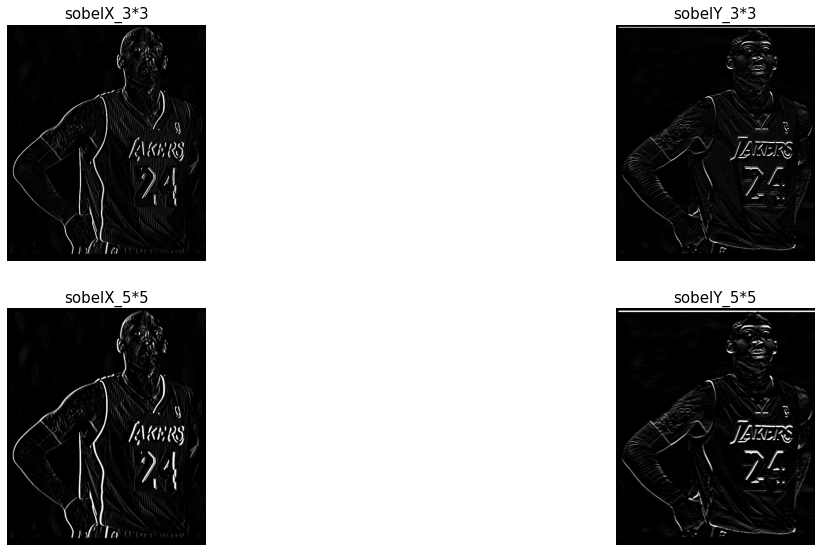

In [21]:
fig = plt.figure()
fig.set_size_inches(20, 20)
plt.subplot(4,2,1)
plt.title("sobelX_3*3",fontsize=15)
plt.imshow(sobx,cmap="gray")
plt.axis('off')
plt.subplot(4,2,2)
plt.title("sobelY_3*3",fontsize=15)
plt.imshow(soby,cmap="gray")
plt.axis('off')

plt.subplot(4,2,3)
plt.title("sobelX_5*5",fontsize=15)
plt.imshow(sobx_5,cmap="gray")
plt.axis('off')
plt.subplot(4,2,4)
plt.title("sobelY_5*5",fontsize=15)
plt.imshow(soby_5,cmap="gray")
plt.axis('off')
plt.show()

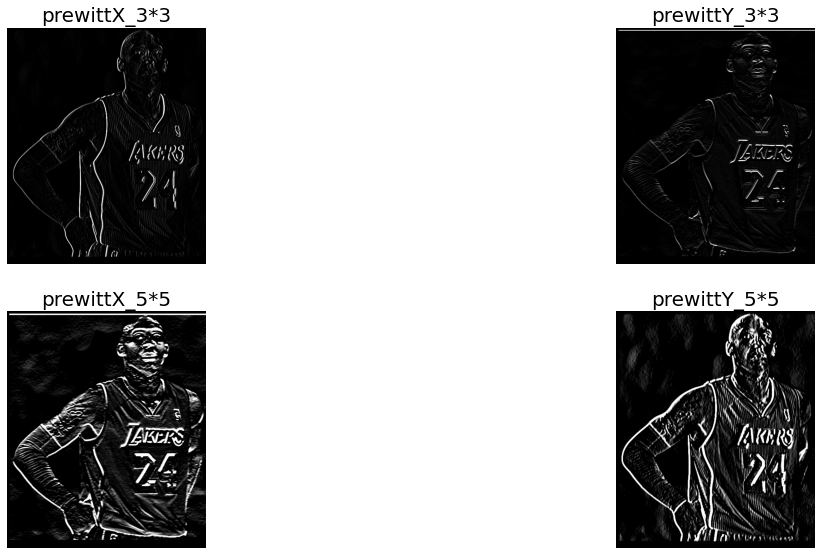

In [22]:
fig = plt.figure()
fig.set_size_inches(20, 20)
plt.subplot(4,2,1)
plt.title("prewittX_3*3",fontsize=20)
plt.imshow(prex,cmap="gray")
plt.axis('off')
plt.subplot(4,2,2)
plt.title("prewittY_3*3",fontsize=20)
plt.imshow(prey,cmap="gray")
plt.axis('off')

plt.subplot(4,2,3)
plt.title("prewittX_5*5",fontsize=20)
plt.imshow(prey_5,cmap="gray")
plt.axis('off')
plt.subplot(4,2,4)
plt.title("prewittY_5*5",fontsize=20)
plt.imshow(prex_5,cmap="gray")
plt.axis('off')
plt.show()

In [23]:
noise = np.random.normal(0,1,kobel.size).astype(np.uint8)
kobel = kobel + noise.reshape(kobel.shape)
kobel = kobel.astype(np.uint8)

In [24]:
sobx = filter2D(kobel,sobelx)
soby = filter2D(kobel,sobely)
prex = filter2D(kobel,prewittx)
prey = filter2D(kobel,prewitty)
robx = filter2D(kobel,robertsx)
roby = filter2D(kobel,robertsy)
lapx = filter2D(kobel,laplacianx)
lapy = filter2D(kobel,laplaciany)


In [25]:
conny = cv2.Canny(kobel,50,200)

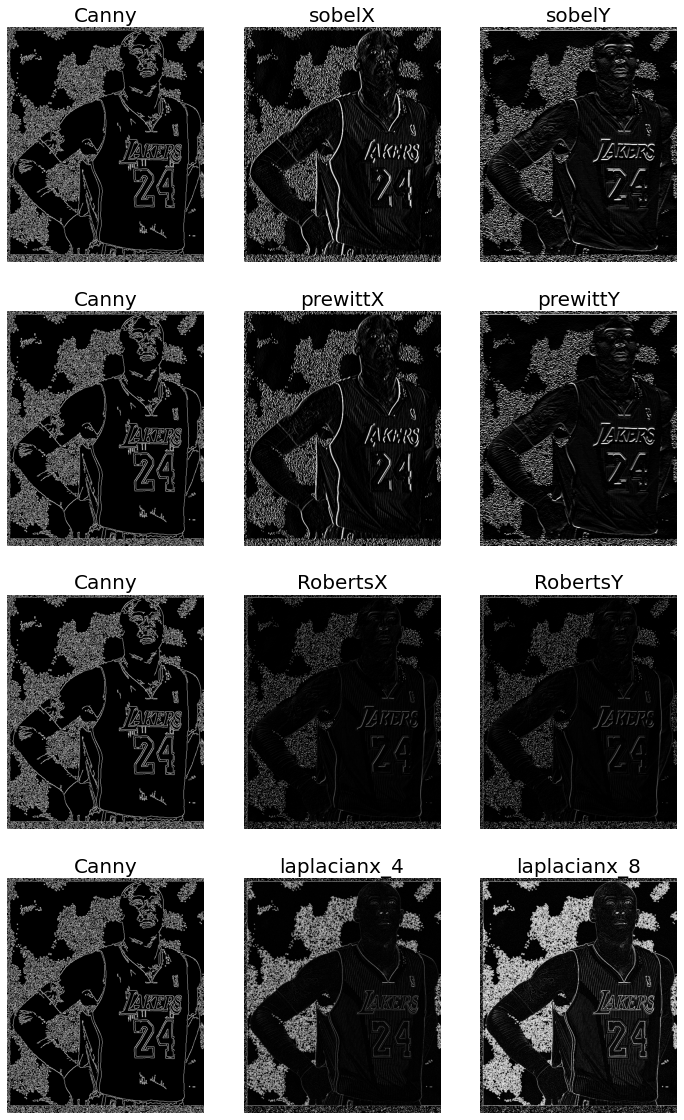

In [26]:
fig = plt.figure()
fig.set_size_inches(12, 20)

plt.subplot(4,3,1)
plt.title("Canny",fontsize=20)
plt.imshow(conny,cmap="gray")
plt.axis('off')
plt.subplot(4,3,2)
plt.title("sobelX",fontsize=20)
plt.imshow(sobx,cmap="gray")
plt.axis('off')
plt.subplot(4,3,3)
plt.title("sobelY",fontsize=20)
plt.imshow(soby,cmap="gray")
plt.axis('off')

plt.subplot(4,3,4)
plt.title("Canny",fontsize=20)
plt.imshow(conny,cmap="gray")
plt.axis('off')
plt.subplot(4,3,5)
plt.title("prewittX",fontsize=20)
plt.imshow(prex,cmap="gray")
plt.axis('off')
plt.subplot(4,3,6)
plt.title("prewittY",fontsize=20)
plt.imshow(prey,cmap="gray")
plt.axis('off')

plt.subplot(4,3,7)
plt.title("Canny",fontsize=20)
plt.imshow(conny,cmap="gray")
plt.axis('off')
plt.subplot(4,3,8)
plt.title("RobertsX",fontsize=20)
plt.imshow(roby,cmap="gray")
plt.axis('off')
plt.subplot(4,3,9)
plt.title("RobertsY",fontsize=20)
plt.imshow(roby,cmap="gray")
plt.axis('off')

plt.subplot(4,3,10)
plt.title("Canny",fontsize=20)
plt.imshow(conny,cmap="gray")
plt.axis('off')
plt.subplot(4,3,11)
plt.title("laplacianx_4",fontsize=20)
plt.imshow(lapx,cmap="gray")
plt.axis('off')
plt.subplot(4,3,12)
plt.title("laplacianx_8",fontsize=20)
plt.imshow(lapy,cmap="gray")
plt.axis('off')
plt.show()

- We can observe that Laplacian doesn't give good results with noise , but canny is able to retrieve the edges even in presence of Noise